In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install Pillow requests
!pip install timm

In [ ]:
#Importing Libraires
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.io import read_image
from torchvision.transforms import Compose, Resize, ToTensor, Normalize, Lambda

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from torchvision.transforms import ToPILImage, Resize, ToTensor, Normalize
from tqdm import tqdm
import timm
import os
import pickle
import torch
from torchvision.transforms import Compose, Resize, ToTensor, Normalize, ToPILImage
from torchvision.io import read_image
from PIL import Image
import requests
from io import BytesIO
import numpy as np

**Loading the mappings**

In [ ]:
def load_pickle_data(file_path):
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    return data
file_path = '/content/mappings_Pinewood.pkl'
data = load_pickle_data(file_path)

print(data)


{'training_data/Pinewood\\2021-08\\VA_Pinewood_Virginia_Beach___2021-08-20_14-06-02-3314-05-00.jpg': -0.72, 'training_data/Pinewood\\2021-11\\VA_Pinewood_Virginia_Beach___2021-11-16_23-48-00-9716-05-00.jpg': -0.55, 'training_data/Pinewood\\2021-10\\VA_Pinewood_Virginia_Beach___2021-10-14_16-48-00-9082-05-00.jpg': 1.82, 'training_data/Pinewood\\2021-08\\VA_Pinewood_Virginia_Beach___2021-08-20_14-00-06-7267-05-00.jpg': -0.7, 'training_data/Pinewood\\2021-11\\VA_Pinewood_Virginia_Beach___2021-11-16_23-42-00-8947-05-00.jpg': -0.52, 'training_data/Pinewood\\2021-10\\VA_Pinewood_Virginia_Beach___2021-10-14_16-42-00-3249-05-00.jpg': 1.79, 'training_data/Pinewood\\2021-08\\VA_Pinewood_Virginia_Beach___2021-08-20_13-54-02-6426-05-00.jpg': -0.67, 'training_data/Pinewood\\2021-11\\VA_Pinewood_Virginia_Beach___2021-11-16_23-36-00-8522-05-00.jpg': -0.48, 'training_data/Pinewood\\2021-10\\VA_Pinewood_Virginia_Beach___2021-10-14_16-36-00-6504-05-00.jpg': 1.75, 'training_data/Pinewood\\2021-08\\VA_Pin

**Mapping The Masked Imgages WITHOUT_WATER To Water Meter Values**

In [ ]:
directory_path = '/content/drive/My Drive/IMAGES_RESULTS_MASKED_IMAGE_WITHOUT_WATER'

files = os.listdir(directory_path)

def get_last_34_chars(path):
    return path[-34:]

results = {}

for file in files:
    file_key = get_last_34_chars(file)
    for key, value in data.items():
        if get_last_34_chars(key) == file_key:
            results[os.path.join(directory_path,file)] = value

print(results)


{'/content/drive/My Drive/IMAGES_RESULTS_MASKED_IMAGE_WITHOUT_WATER/VA_Pinewood_Virginia_Beach___2021-10-04_08-48-01-0552-05-00.jpg': 0.79, '/content/drive/My Drive/IMAGES_RESULTS_MASKED_IMAGE_WITHOUT_WATER/VA_Pinewood_Virginia_Beach___2021-10-04_08-18-00-6034-05-00.jpg': 0.78, '/content/drive/My Drive/IMAGES_RESULTS_MASKED_IMAGE_WITHOUT_WATER/VA_Pinewood_Virginia_Beach___2021-10-04_08-42-00-7290-05-00.jpg': 0.8, '/content/drive/My Drive/IMAGES_RESULTS_MASKED_IMAGE_WITHOUT_WATER/VA_Pinewood_Virginia_Beach___2021-10-04_09-00-00-4877-05-00.jpg': 0.74, '/content/drive/My Drive/IMAGES_RESULTS_MASKED_IMAGE_WITHOUT_WATER/VA_Pinewood_Virginia_Beach___2021-10-04_08-30-15-4773-05-00.jpg': 0.8, '/content/drive/My Drive/IMAGES_RESULTS_MASKED_IMAGE_WITHOUT_WATER/VA_Pinewood_Virginia_Beach___2021-10-04_08-24-00-4938-05-00.jpg': 0.79, '/content/drive/My Drive/IMAGES_RESULTS_MASKED_IMAGE_WITHOUT_WATER/VA_Pinewood_Virginia_Beach___2021-10-04_08-36-00-4077-05-00.jpg': 0.8, '/content/drive/My Drive/IMAG

**Mapping The Masked Imgages WITH_WATER To Water Meter Values**

In [ ]:
directory_path = '/content/drive/My Drive/IMAGES_RESULTS_MASKED_IMAGE'

files = os.listdir(directory_path)

def get_last_34_chars(path):
    return path[-34:]

results_1 = {}

for file in files:
    file_key = get_last_34_chars(file)
    for key, value in data.items():
        if get_last_34_chars(key) == file_key:
            results_1[os.path.join(directory_path,file)] = value

print(results_1)


{'/content/drive/My Drive/IMAGES_RESULTS_MASKED_IMAGE/VA_Pinewood_Virginia_Beach___2021-10-04_08-48-01-0552-05-00.jpg': 0.79, '/content/drive/My Drive/IMAGES_RESULTS_MASKED_IMAGE/VA_Pinewood_Virginia_Beach___2021-10-04_08-18-00-6034-05-00.jpg': 0.78, '/content/drive/My Drive/IMAGES_RESULTS_MASKED_IMAGE/VA_Pinewood_Virginia_Beach___2021-10-04_08-42-00-7290-05-00.jpg': 0.8, '/content/drive/My Drive/IMAGES_RESULTS_MASKED_IMAGE/VA_Pinewood_Virginia_Beach___2021-10-04_09-00-00-4877-05-00.jpg': 0.74, '/content/drive/My Drive/IMAGES_RESULTS_MASKED_IMAGE/VA_Pinewood_Virginia_Beach___2021-10-04_08-30-15-4773-05-00.jpg': 0.8, '/content/drive/My Drive/IMAGES_RESULTS_MASKED_IMAGE/VA_Pinewood_Virginia_Beach___2021-10-04_08-24-00-4938-05-00.jpg': 0.79, '/content/drive/My Drive/IMAGES_RESULTS_MASKED_IMAGE/VA_Pinewood_Virginia_Beach___2021-10-04_08-36-00-4077-05-00.jpg': 0.8, '/content/drive/My Drive/IMAGES_RESULTS_MASKED_IMAGE/VA_Pinewood_Virginia_Beach___2021-10-04_08-54-00-4963-05-00.jpg': 0.77, '/

**Model Training Mapped Images Without Water**

In [ ]:
results = results

# Dataset class
class Dataset(torch.utils.data.Dataset):
    def __init__(self, mappings, input_img_size, model_config, scaler=None):
        self.image_paths = list(mappings.keys())
        self.targets = [mappings[path] for path in self.image_paths]

        if not scaler:
            self.scaler = StandardScaler()
            self.targets_scaled = self.scaler.fit_transform(np.array(self.targets).reshape(-1, 1)).flatten()
        else:
            self.scaler = scaler
            self.targets_scaled = self.scaler.transform(np.array(self.targets).reshape(-1, 1)).flatten()

        self.transforms = Compose([
            ToPILImage(),
            Resize((input_img_size, input_img_size)),
            ToTensor(),
            Normalize(mean=model_config['mean'], std=model_config['std'])
        ])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        target_scaled = self.targets_scaled[idx]
        image = read_image(image_path).float() / 255
        image = self.transforms(image)
        return image, target_scaled

    def reverse_scale(self, iterable):
        return self.scaler.inverse_transform(iterable.reshape(-1, 1)).flatten()

# Model class
class EfficientNet(nn.Module):
    class RegressionLayers(nn.Module):
        def __init__(self, in_features):
            super(EfficientNet.RegressionLayers, self).__init__()
            self.layers = nn.Sequential(
                nn.Flatten(),
                nn.Linear(in_features, 1024),
                nn.GELU(),
                nn.Linear(1024, 512),
                nn.GELU(),
                nn.Linear(512, 128),
                nn.GELU(),
                nn.Linear(128, 1)
            )

        def forward(self, x):
            return self.layers(x.float())

    def __init__(self, device, param_freeze_ratio=0.5):
        super(EfficientNet, self).__init__()
        self.model = timm.create_model('tf_efficientnet_l2.ns_jft_in1k', pretrained=True)
        self.model.reset_classifier(0)

        total_params = sum(p.numel() for p in self.model.parameters())
        params_to_freeze = int(total_params * param_freeze_ratio)
        frozen_params_count = 0
        for param in self.model.parameters():
            if frozen_params_count >= params_to_freeze:
                break
            param.requires_grad = False
            frozen_params_count += param.numel()

        n_features = self.model.forward_features(torch.randn(1, 3, 224, 224)).shape[1]
        self.model.classifier = EfficientNet.RegressionLayers(n_features)
        self.model = self.model.to(device)

    def forward(self, x):
        return self.model.forward(x)

# Main execution setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_img_size = 224
batch_size = 10
num_epochs = 20

# Splitting the dataset
image_paths = list(results.keys())
targets = [results[path] for path in image_paths]
image_paths_train, image_paths_test, targets_train, targets_test = train_test_split(
    image_paths, targets, test_size=0.2, random_state=42)

# Normalizing target values
scaler = StandardScaler()
targets_scaled_train = scaler.fit_transform(np.array(targets_train).reshape(-1, 1)).flatten()
targets_scaled_test = scaler.transform(np.array(targets_test).reshape(-1, 1)).flatten()

# Creating training and testing datasets
train_dataset = Dataset(dict(zip(image_paths_train, targets_scaled_train)), input_img_size, {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]})
test_dataset = Dataset(dict(zip(image_paths_test, targets_scaled_test)), input_img_size, {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]})

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model training
model = EfficientNet(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for images, targets in tqdm(train_loader):
        images, targets = images.to(device), targets.to(device).float()  # Ensure targets are float
        optimizer.zero_grad()
        outputs = model(images).flatten()
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}, Average Loss: {avg_loss}")

# Model evaluation
model.eval()
predictions, actuals = [], []
with torch.no_grad():
    for images, targets in test_loader:
        images = images.to(device)
        outputs = model(images).flatten().cpu()
        predictions.extend(test_dataset.reverse_scale(outputs.numpy()))
        actuals.extend(test_dataset.reverse_scale(targets.cpu().numpy()))

rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f"Test RMSE: {rmse}")


100%|██████████| 9/9 [00:12<00:00,  1.37s/it]


Epoch 1, Average Loss: 1.0980489088429346


100%|██████████| 9/9 [00:12<00:00,  1.36s/it]


Epoch 2, Average Loss: 1.132592260837555


100%|██████████| 9/9 [00:12<00:00,  1.36s/it]


Epoch 3, Average Loss: 0.636667443646325


100%|██████████| 9/9 [00:12<00:00,  1.38s/it]


Epoch 4, Average Loss: 0.4941561222076416


100%|██████████| 9/9 [00:12<00:00,  1.38s/it]


Epoch 5, Average Loss: 0.4642702440420787


100%|██████████| 9/9 [00:12<00:00,  1.39s/it]


Epoch 6, Average Loss: 0.2330391084154447


100%|██████████| 9/9 [00:12<00:00,  1.39s/it]


Epoch 7, Average Loss: 0.1371643990278244


100%|██████████| 9/9 [00:12<00:00,  1.36s/it]


Epoch 8, Average Loss: 0.14291938642660776


100%|██████████| 9/9 [00:12<00:00,  1.35s/it]


Epoch 9, Average Loss: 0.22483579566081366


100%|██████████| 9/9 [00:12<00:00,  1.37s/it]


Epoch 10, Average Loss: 0.23173759919073847


100%|██████████| 9/9 [00:12<00:00,  1.38s/it]


Epoch 11, Average Loss: 0.13866917023228276


100%|██████████| 9/9 [00:12<00:00,  1.38s/it]


Epoch 12, Average Loss: 0.23084232128328747


100%|██████████| 9/9 [00:12<00:00,  1.38s/it]


Epoch 13, Average Loss: 0.1751585892505116


100%|██████████| 9/9 [00:12<00:00,  1.36s/it]


Epoch 14, Average Loss: 0.09645394215153323


100%|██████████| 9/9 [00:12<00:00,  1.35s/it]


Epoch 15, Average Loss: 0.12128614303138521


100%|██████████| 9/9 [00:12<00:00,  1.36s/it]


Epoch 16, Average Loss: 0.10369716936515437


100%|██████████| 9/9 [00:12<00:00,  1.36s/it]


Epoch 17, Average Loss: 0.22170012651218307


100%|██████████| 9/9 [00:12<00:00,  1.38s/it]


Epoch 18, Average Loss: 0.0833350018494659


100%|██████████| 9/9 [00:12<00:00,  1.37s/it]


Epoch 19, Average Loss: 0.2703050747513771


100%|██████████| 9/9 [00:12<00:00,  1.36s/it]


Epoch 20, Average Loss: 0.25908228837781483
Test RMSE: 0.4264337192899036


In [ ]:
torch.save(model.state_dict(), 'efficientnet_model_Without_Water.pth')
torch.save(model, 'efficientnet_full_model_Without_Water.pth')

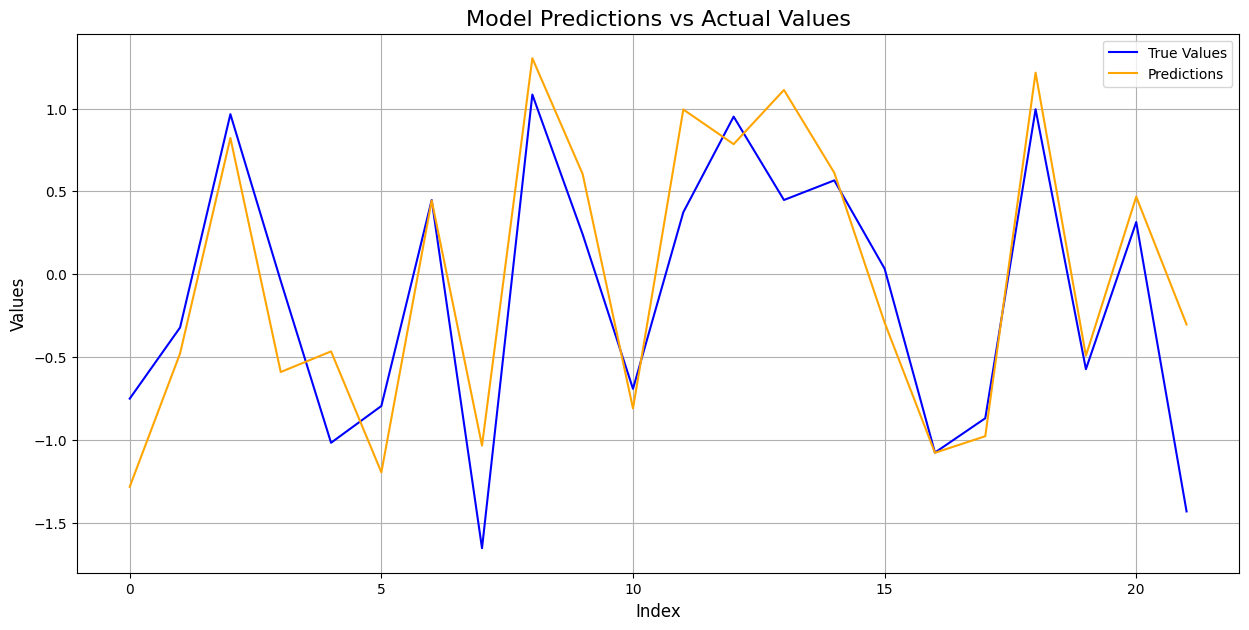

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 7))  # Adjust the figure size as needed
ax.plot(actuals, label='True Values', color='blue')  # Blue line for actual values
ax.plot(predictions, label='Predictions', color='orange')  # Orange line for predictions
ax.set_title('Model Predictions vs Actual Values', fontsize=16)
ax.set_xlabel('Index', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.legend()
ax.grid(True)
plt.show()


**Model Training Mapped Images With Water**

In [ ]:
results = results_1

# Dataset class
class Dataset(torch.utils.data.Dataset):
    def __init__(self, mappings, input_img_size, model_config, scaler=None):
        self.image_paths = list(mappings.keys())
        self.targets = [mappings[path] for path in self.image_paths]

        if not scaler:
            self.scaler = StandardScaler()
            self.targets_scaled = self.scaler.fit_transform(np.array(self.targets).reshape(-1, 1)).flatten()
        else:
            self.scaler = scaler
            self.targets_scaled = self.scaler.transform(np.array(self.targets).reshape(-1, 1)).flatten()

        self.transforms = Compose([
            ToPILImage(),
            Resize((input_img_size, input_img_size)),
            ToTensor(),
            Normalize(mean=model_config['mean'], std=model_config['std'])
        ])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        target_scaled = self.targets_scaled[idx]
        image = read_image(image_path).float() / 255
        image = self.transforms(image)
        return image, target_scaled

    def reverse_scale(self, iterable):
        return self.scaler.inverse_transform(iterable.reshape(-1, 1)).flatten()

# Model class
class EfficientNet(nn.Module):
    class RegressionLayers(nn.Module):
        def __init__(self, in_features):
            super(EfficientNet.RegressionLayers, self).__init__()
            self.layers = nn.Sequential(
                nn.Flatten(),
                nn.Linear(in_features, 1024),
                nn.GELU(),
                nn.Linear(1024, 512),
                nn.GELU(),
                nn.Linear(512, 128),
                nn.GELU(),
                nn.Linear(128, 1)
            )

        def forward(self, x):
            return self.layers(x.float())

    def __init__(self, device, param_freeze_ratio=0.5):
        super(EfficientNet, self).__init__()
        self.model = timm.create_model('tf_efficientnet_l2.ns_jft_in1k', pretrained=True)
        self.model.reset_classifier(0)

        total_params = sum(p.numel() for p in self.model.parameters())
        params_to_freeze = int(total_params * param_freeze_ratio)
        frozen_params_count = 0
        for param in self.model.parameters():
            if frozen_params_count >= params_to_freeze:
                break
            param.requires_grad = False
            frozen_params_count += param.numel()

        n_features = self.model.forward_features(torch.randn(1, 3, 224, 224)).shape[1]
        self.model.classifier = EfficientNet.RegressionLayers(n_features)
        self.model = self.model.to(device)

    def forward(self, x):
        return self.model.forward(x)

# Main execution setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_img_size = 224
batch_size = 10
num_epochs = 20

# Splitting the dataset
image_paths = list(results.keys())
targets = [results[path] for path in image_paths]
image_paths_train, image_paths_test, targets_train, targets_test = train_test_split(
    image_paths, targets, test_size=0.2, random_state=42)

# Normalizing target values
scaler = StandardScaler()
targets_scaled_train = scaler.fit_transform(np.array(targets_train).reshape(-1, 1)).flatten()
targets_scaled_test = scaler.transform(np.array(targets_test).reshape(-1, 1)).flatten()

# Creating training and testing datasets
train_dataset = Dataset(dict(zip(image_paths_train, targets_scaled_train)), input_img_size, {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]})
test_dataset = Dataset(dict(zip(image_paths_test, targets_scaled_test)), input_img_size, {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]})

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model training
model = EfficientNet(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for images, targets in tqdm(train_loader):
        images, targets = images.to(device), targets.to(device).float()  # Ensure targets are float
        optimizer.zero_grad()
        outputs = model(images).flatten()
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}, Average Loss: {avg_loss}")

# Model evaluation
model.eval()
predictions, actuals = [], []
with torch.no_grad():
    for images, targets in test_loader:
        images = images.to(device)
        outputs = model(images).flatten().cpu()
        predictions.extend(test_dataset.reverse_scale(outputs.numpy()))
        actuals.extend(test_dataset.reverse_scale(targets.cpu().numpy()))

rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f"Test RMSE: {rmse}")


100%|██████████| 9/9 [00:12<00:00,  1.37s/it]


Epoch 1, Average Loss: 1.7011521756649017


100%|██████████| 9/9 [00:12<00:00,  1.36s/it]


Epoch 2, Average Loss: 1.0056616697046492


100%|██████████| 9/9 [00:12<00:00,  1.35s/it]


Epoch 3, Average Loss: 0.6882266468471951


100%|██████████| 9/9 [00:12<00:00,  1.35s/it]


Epoch 4, Average Loss: 0.6265213489532471


100%|██████████| 9/9 [00:12<00:00,  1.36s/it]


Epoch 5, Average Loss: 0.4044061170683967


100%|██████████| 9/9 [00:12<00:00,  1.38s/it]


Epoch 6, Average Loss: 0.5050791303316752


100%|██████████| 9/9 [00:12<00:00,  1.37s/it]


Epoch 7, Average Loss: 0.5820480237404505


100%|██████████| 9/9 [00:12<00:00,  1.38s/it]


Epoch 8, Average Loss: 0.32215382821030086


100%|██████████| 9/9 [00:12<00:00,  1.36s/it]


Epoch 9, Average Loss: 0.31755667676528293


100%|██████████| 9/9 [00:12<00:00,  1.37s/it]


Epoch 10, Average Loss: 0.23743130846156013


100%|██████████| 9/9 [00:12<00:00,  1.35s/it]


Epoch 11, Average Loss: 0.3718308326270845


100%|██████████| 9/9 [00:12<00:00,  1.36s/it]


Epoch 12, Average Loss: 0.28010280844238067


100%|██████████| 9/9 [00:12<00:00,  1.36s/it]


Epoch 13, Average Loss: 0.11257663327786657


100%|██████████| 9/9 [00:12<00:00,  1.35s/it]


Epoch 14, Average Loss: 0.31380100299914676


100%|██████████| 9/9 [00:12<00:00,  1.36s/it]


Epoch 15, Average Loss: 0.3555176638894611


100%|██████████| 9/9 [00:12<00:00,  1.35s/it]


Epoch 16, Average Loss: 0.16240314828852812


100%|██████████| 9/9 [00:12<00:00,  1.36s/it]


Epoch 17, Average Loss: 0.12916622476445305


100%|██████████| 9/9 [00:12<00:00,  1.34s/it]


Epoch 18, Average Loss: 0.1459860342244307


100%|██████████| 9/9 [00:12<00:00,  1.34s/it]


Epoch 19, Average Loss: 0.13790253094500965


100%|██████████| 9/9 [00:12<00:00,  1.35s/it]


Epoch 20, Average Loss: 0.16248079968823326
Test RMSE: 0.3378526842825769


In [ ]:
torch.save(model.state_dict(), 'efficientnet_model_With_Water.pth')
torch.save(model, 'efficientnet_full_model_With_Water.pth')

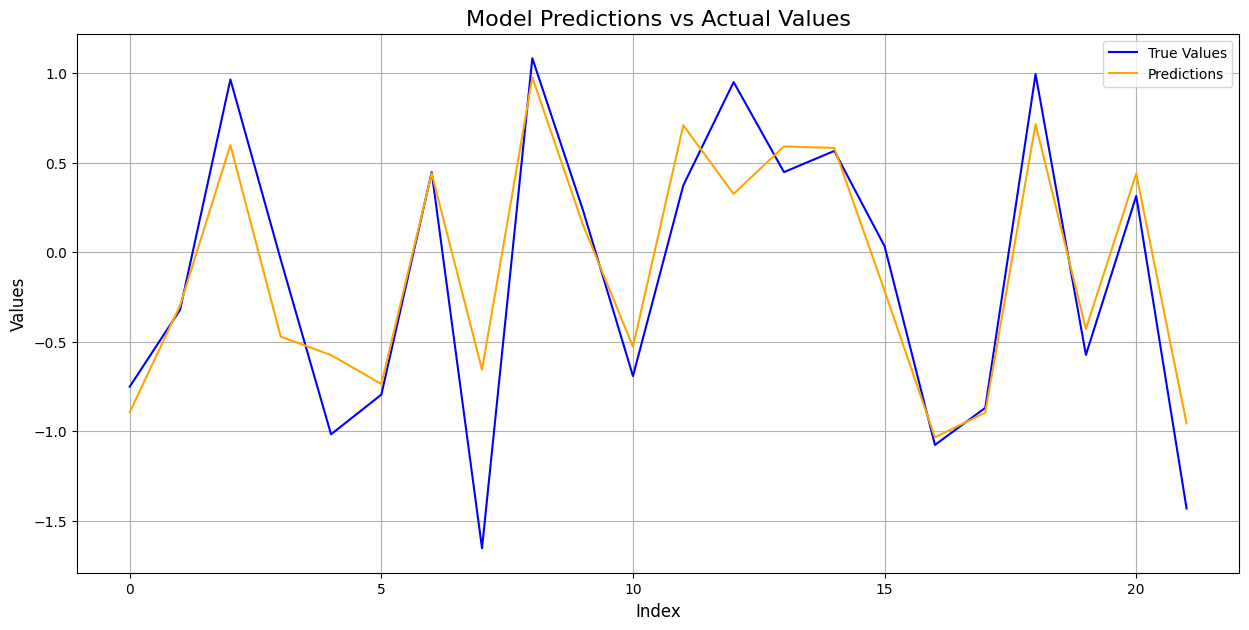

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(actuals, label='True Values', color='blue')
ax.plot(predictions, label='Predictions', color='orange')
ax.set_title('Model Predictions vs Actual Values', fontsize=16)
ax.set_xlabel('Index', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.legend()
ax.grid(True)
plt.show()


**Comparing The Trained model Results With prev Model**

In [ ]:
df = pd.read_excel('/content/Pinewood_validation_results_test.xlsx')

In [ ]:
df=df.head(100)

In [ ]:
subset_df = df[['image_url', 'y_true']]
result_dict = dict(zip(subset_df['image_url'], subset_df['y_true']))
print(result_dict)


{'https://ngwos-imagery.s3.amazonaws.com/b6e90a1f-691d-4cca-b9b8-9ae4c78652af/2022-01-01T00:00:00.jpg': -0.03, 'https://ngwos-imagery.s3.amazonaws.com/b6e90a1f-691d-4cca-b9b8-9ae4c78652af/2022-01-01T00:06:00.jpg': -0.07, 'https://ngwos-imagery.s3.amazonaws.com/b6e90a1f-691d-4cca-b9b8-9ae4c78652af/2022-01-01T00:12:00.jpg': -0.12, 'https://ngwos-imagery.s3.amazonaws.com/b6e90a1f-691d-4cca-b9b8-9ae4c78652af/2022-01-01T00:18:00.jpg': -0.16, 'https://ngwos-imagery.s3.amazonaws.com/b6e90a1f-691d-4cca-b9b8-9ae4c78652af/2022-01-01T00:24:00.jpg': -0.2, 'https://ngwos-imagery.s3.amazonaws.com/b6e90a1f-691d-4cca-b9b8-9ae4c78652af/2022-01-01T00:30:00.jpg': -0.23, 'https://ngwos-imagery.s3.amazonaws.com/b6e90a1f-691d-4cca-b9b8-9ae4c78652af/2022-01-01T00:36:00.jpg': -0.27, 'https://ngwos-imagery.s3.amazonaws.com/b6e90a1f-691d-4cca-b9b8-9ae4c78652af/2022-01-01T00:42:00.jpg': -0.3, 'https://ngwos-imagery.s3.amazonaws.com/b6e90a1f-691d-4cca-b9b8-9ae4c78652af/2022-01-01T00:48:00.jpg': -0.33, 'https://ng

In [ ]:
# Load the saved model
model = torch.load('efficientnet_full_model_With_Water.pth')
model.eval()  # Set the model to evaluation mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define transformations
transform = Compose([
    Resize((224, 224)),  # Ensure dimensions match those used during training
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Function to load image from URL
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    return img

# Function to predict from URL
def predict_from_url(url, model, transform):
    try:
        image = load_image_from_url(url)
        image = transform(image).unsqueeze(0)  # Add batch dimension
        image = image.to(device)  # Move to the same device as model
        with torch.no_grad():
            prediction = model(image).flatten()
            return prediction.cpu().item()  # Move data to CPU and convert to numpy, then get scalar
    except Exception as e:
        print(f"Error processing {url}: {e}")
        return None

# Assuming result_dict is already defined
# Example dictionary, replace with actual URLs and values
# result_dict = {'http://example.com/image1.jpg': 0.5, 'http://example.com/image2.jpg': 0.6}
predictions = {url: predict_from_url(url, model, transform) for url in result_dict.keys()}

print(predictions)


<ipython-input-33-862b71642b1a>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('efficientnet_full_model_With_Water.pth')


{'https://ngwos-imagery.s3.amazonaws.com/b6e90a1f-691d-4cca-b9b8-9ae4c78652af/2022-01-01T00:00:00.jpg': 69521952.0, 'https://ngwos-imagery.s3.amazonaws.com/b6e90a1f-691d-4cca-b9b8-9ae4c78652af/2022-01-01T00:06:00.jpg': 5086278656.0, 'https://ngwos-imagery.s3.amazonaws.com/b6e90a1f-691d-4cca-b9b8-9ae4c78652af/2022-01-01T00:12:00.jpg': 124530384.0, 'https://ngwos-imagery.s3.amazonaws.com/b6e90a1f-691d-4cca-b9b8-9ae4c78652af/2022-01-01T00:18:00.jpg': 58916568.0, 'https://ngwos-imagery.s3.amazonaws.com/b6e90a1f-691d-4cca-b9b8-9ae4c78652af/2022-01-01T00:24:00.jpg': 1520662656.0, 'https://ngwos-imagery.s3.amazonaws.com/b6e90a1f-691d-4cca-b9b8-9ae4c78652af/2022-01-01T00:30:00.jpg': 58319748.0, 'https://ngwos-imagery.s3.amazonaws.com/b6e90a1f-691d-4cca-b9b8-9ae4c78652af/2022-01-01T00:36:00.jpg': 291358.15625, 'https://ngwos-imagery.s3.amazonaws.com/b6e90a1f-691d-4cca-b9b8-9ae4c78652af/2022-01-01T00:42:00.jpg': 478158.71875, 'https://ngwos-imagery.s3.amazonaws.com/b6e90a1f-691d-4cca-b9b8-9ae4c7

In [ ]:
# Map predictions to the DataFrame using the image_url as a key
df['new_y_pred'] = df['image_url'].map(predictions)

# Calculate the new differences
df['new_diff'] = (df['new_y_pred'] - df['y_true']).abs()

# If you want to compare new predictions with old ones:
df['diff_between_preds'] = (df['new_y_pred'] - df['y_pred']).abs()

print(df.head())

     y_pred  y_true      Diff  \
0 -0.031675   -0.03  0.001675   
1 -0.086637   -0.07  0.016637   
2 -0.101181   -0.12  0.018819   
3 -0.143038   -0.16  0.016962   
4 -0.166510   -0.20  0.033490   

                                           image_url    new_y_pred  \
0  https://ngwos-imagery.s3.amazonaws.com/b6e90a1...  6.952195e+07   
1  https://ngwos-imagery.s3.amazonaws.com/b6e90a1...  5.086279e+09   
2  https://ngwos-imagery.s3.amazonaws.com/b6e90a1...  1.245304e+08   
3  https://ngwos-imagery.s3.amazonaws.com/b6e90a1...  5.891657e+07   
4  https://ngwos-imagery.s3.amazonaws.com/b6e90a1...  1.520663e+09   

       new_diff  diff_between_preds  
0  6.952195e+07        6.952195e+07  
1  5.086279e+09        5.086279e+09  
2  1.245304e+08        1.245304e+08  
3  5.891657e+07        5.891657e+07  
4  1.520663e+09        1.520663e+09  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   y_pred              100 non-null    float64
 1   y_true              100 non-null    float64
 2   Diff                100 non-null    float64
 3   image_url           100 non-null    object 
 4   new_y_pred          100 non-null    float64
 5   new_diff            100 non-null    float64
 6   diff_between_preds  100 non-null    float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [ ]:
sum(df['new_diff'])

274753493788.47406

In [ ]:
sum(df['Diff'])

0.928005087